# Chapter 2 統計の基礎
## 2.1 尺度水準

* 名義尺度
* 順序尺度
* 間隔尺度
* 比例尺度・比率尺度

## 代表値

* 平均値 $\bar{X}$ （算術平均）

In [1]:
X <- c(0, 7, 8, 9, 100)
mean(X)

[1] 24.8

* NA: 欠損値
* NaN: Not a Number

In [2]:
Y <- c(0, 7, 8, NA, 0/0)
Y

[1]   0   7   8  NA NaN

In [3]:
mean(Y)

[1] NA

`na.rm = TRUE` は NaN も消す

In [4]:
mean(Y, na.rm = TRUE)

[1] 5

* 幾何平均
* トリム平均

20%除去

In [5]:
mean(X, trim = 0.2)

[1] 8

In [6]:
mean(X[2:4])

[1] 8

* 中央値

In [7]:
median(X)

[1] 8

* ウィンザライズド平均
* ミッドレンジ

## 2.3 確率変数，乱数，母集団，標本

* 分散，母分散

$$\sigma^2 = V(X) = E((X - \mu)^2), \mu = E(X)$$

* 標準偏差

$$\sigma = \sqrt{E((X - \mu)^2}$$

確率変数$X$，$Y$が独立なら，和の分散は分散の和なので，

$$ \sigma^2_{X \pm Y} = \sigma^2_X + \sigma^2_Y $$

標本分散は $n-1$ で割る

$$\frac{1}{n-1}\sum\limits^n_{ti = 1}(X_i - \bar{X})^2$$

In [9]:
x <- 1:5
var(x)

[1] 2.5

どれか一つを外して分散を出す

In [10]:
apply(combn(c(1:5), 4), 2, var)

[1] 1.666667 2.916667 3.333333 2.916667 1.666667

平均は元の分散と一致

In [11]:
library(pipeR)

In [12]:
apply(combn(c(1:5), 4), 2, var) %>>% mean()

[1] 2.5

$n$ で割る分散

In [13]:
varp <- function(x){var(x) * (length(x) - 1) / length(x)}

In [14]:
varp(x)

[1] 2

In [15]:
var(x)

[1] 2.5

* 標準偏差

In [16]:
x <- 1:10
sd(x)

[1] 3.02765

* 四分位範囲（IQR），五数要約

In [18]:
x <- 1:9
IQR(x)

[1] 4

In [19]:
quantile(x)

0%  25%  50%  75% 100% 
   1    3    5    7    9

In [20]:
fivenum(x)

[1] 1 3 5 7 9

In [21]:
y <- c(1, 2, 4, 8, 16, 32)
IQR(y)

[1] 11.5

In [22]:
quantile(y)

0%  25%  50%  75% 100% 
 1.0  2.5  6.0 14.0 32.0

In [23]:
fivenum(y)

[1]  1  2  6 16 32

## 2.5 中心極限定理と正規分布

In [24]:
runif(1)

[1] 0.1217443

In [25]:
runif(10)

[1] 0.79460367 0.07691248 0.11178804 0.03295802 0.16705576 0.30156335
 [7] 0.03662202 0.36820221 0.02813920 0.31407770

In [26]:
library(ggplot2)

In [29]:
options(repr.plot.width = 4, repr.plot.height = 4)

0.5引いて範囲を $-0.5 \leq x \leq 0.5$ に

分散は，

$$\int^{0.5}_{0.5} x^2dx = \frac{1}{12}$$

なので，12個足すと1になる

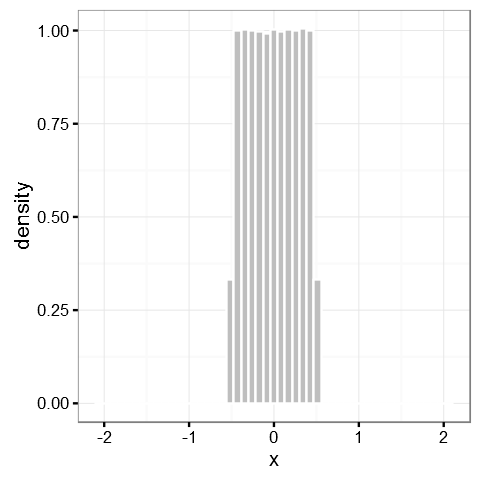

In [42]:
X <- runif(1000000) - 0.5
data.frame(x = X) %>>% 
    ggplot(aes(x = x, y = ..density..)) + 
        geom_histogram(bins = 50, fill = "gray", colour = "white") + 
        theme_bw() + 
        scale_x_continuous(limits = c(-2.1, 2.1))

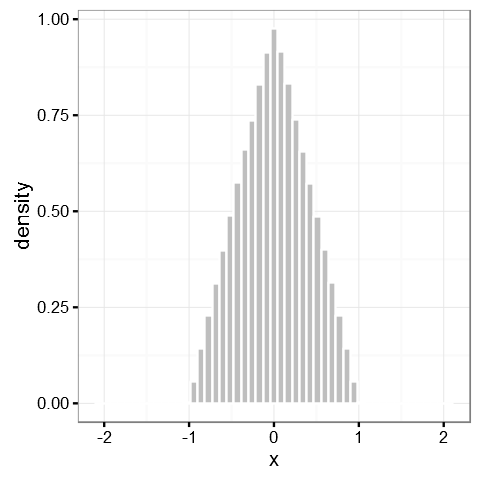

In [43]:
X <- (runif(1000000) - 0.5) + (runif(1000000) - 0.5)
data.frame(x = X) %>>% 
    ggplot(aes(x = x, y = ..density..)) + 
        geom_histogram(bins = 50, fill = "gray", colour = "white") + 
        theme_bw() + 
        scale_x_continuous(limits = c(-2.1, 2.1))

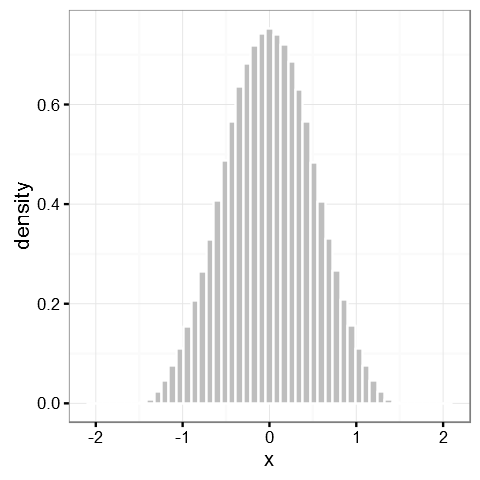

In [44]:
X <- (runif(1000000) - 0.5) + (runif(1000000) - 0.5) + (runif(1000000) - 0.5)
data.frame(x = X) %>>% 
    ggplot(aes(x = x, y = ..density..)) + 
        geom_histogram(bins = 50, fill = "gray", colour = "white") + 
        theme_bw() + 
        scale_x_continuous(limits = c(-2.1, 2.1))

In [54]:
c(1:12) %>>% 
    lapply(function(x){
        runif(10) - 0.5}
    ) %>>% 
    {do.call(rbind, (.))} %>>%
    apply(2, sum)

[1] -1.2079478 -0.2743236  0.3802059 -0.1576849 -2.5390899 -0.5019338
 [7]  1.4538148 -0.4154052 -0.4228788 -0.8808785

In [61]:
X <- c(1:12) %>>% 
        lapply(function(x){
            runif(1000000) - 0.5}
        ) %>>% 
        {do.call(rbind, (.))} %>>%
        apply(2, sum)

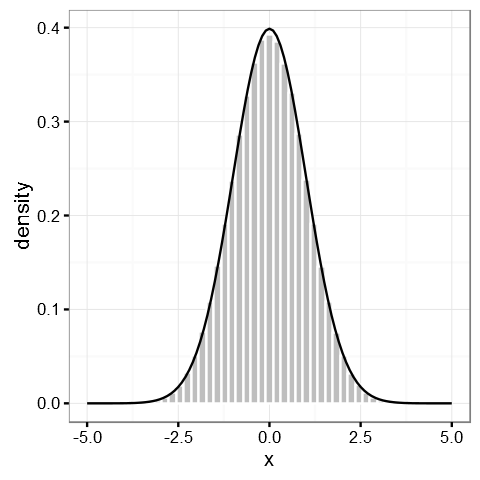

In [71]:
data.frame(x = X) %>>% 
    ggplot(aes(x)) + 
        geom_histogram(aes(y = ..density..), bins = 50, fill = "gray", colour = "white") + 
        theme_bw() + 
        scale_x_continuous(limits = c(-5, 5)) + 
        stat_function(fun = dnorm)

* 標準正規分布

$$ f(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{x^2}{2}\right) $$

$-\infty$ から $\infty$ まで積分すると1になる

In [74]:
dnorm(1)

[1] 0.2419707

In [75]:
(1 / sqrt(2 * pi)) * exp(-1^2 / 2)

[1] 0.2419707

$$\int^{\infty}_{-\infty} -\frac{x^2}{2}dx$$

In [76]:
integrate(function(x){exp(-x^2/2)}, -Inf, Inf)

2.506628 with absolute error < 0.00023

In [77]:
sqrt(2 * pi)

[1] 2.506628